In [4]:
pip install numpy seaborn pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\LAB4-StudentPC46\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
dengue = pd.read_csv("dengue.csv")

In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Region'] = dengue['Region'].astype('category')
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')

In [7]:
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [8]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>INSIGHT 1</h1>

<h2>Total Dengue Cases by Year</h2>

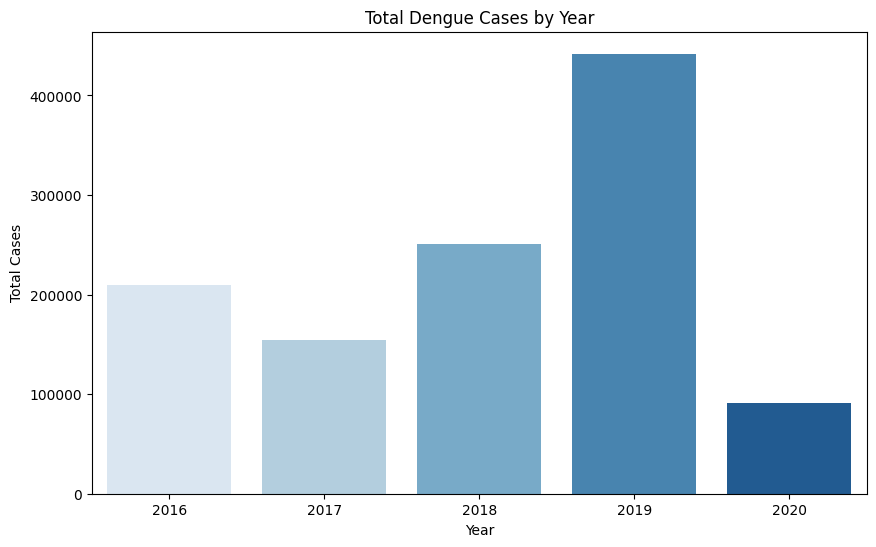

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64


In [9]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_cases.index, y=yearly_cases.values, palette='Blues')
plt.title('Total Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.show()

print(f'{yearly_cases}')

<h3>There was a steady increase in dengue cases from 2016 to 2019, peaking at 441,902 cases in 2019. However, 2020 saw a sharp decline to 91,041 cases. This drop might signal significant changes in health measures or external factors affecting reporting.</h3>

<h1>INSIGHT 2</h1>
<h2>Year with the Highest Dengue Cases</h2>

In [10]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
highest_year = yearly_cases.idxmax()
highest_cases = yearly_cases.max()
print("The year with the highest dengue cases is:", highest_year)
print("Number of cases:", highest_cases)


The year with the highest dengue cases is: 2019
Number of cases: 441902


<h1>INSIGHT 3</h1>

<h2>Monthly Dengue Cases Distribution</h2>

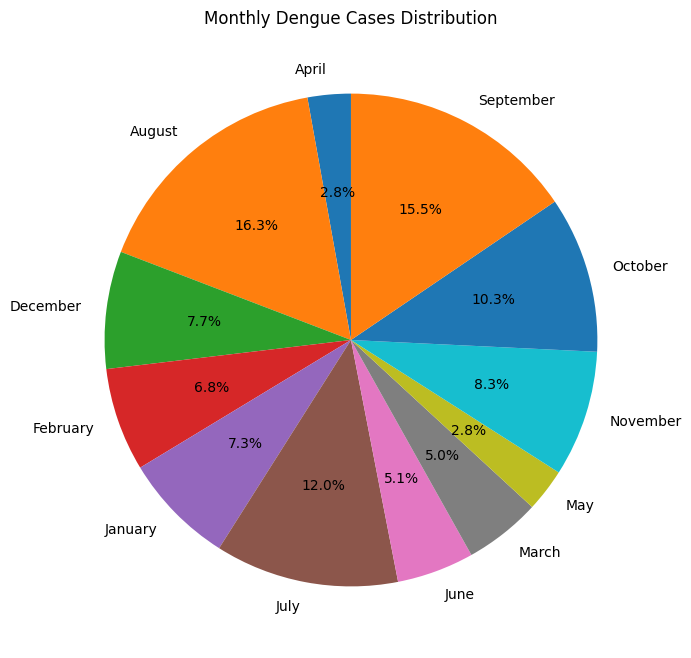

Month
April         32508
August       187554
December      88431
February      77801
January       84328
July         138242
June          58110
March         57576
May           32387
November      94900
October      117645
September    177943
Name: Dengue_Cases, dtype: int64


In [11]:
monthly_cases = dengue.groupby('Month')['Dengue_Cases'].sum().reindex()
plt.figure(figsize=(8, 8))
plt.pie(monthly_cases, labels=monthly_cases.index, autopct='%1.1f%%', startangle=90)
plt.title('Monthly Dengue Cases Distribution')
plt.show()

print(f'{monthly_cases}')

<h3>Here's a quick insight: The monthly distribution of dengue cases shows that August, September, and October have the highest number of cases, peaking in August with 187,554 cases. This suggests a seasonal trend, possibly tied to weather conditions or other environmental factors. Conversely, May and April see the lowest numbers, indicating a potential pattern worth further investigation.</h3>

<h1>INSIGHT 4</h1>
<h2> Monthly dengue case distribution on the year of 2017</h2>

In [12]:
m_dengue = dengue[dengue['Year'] == 2017]
monthly_distribution = m_dengue.groupby('Month')['Dengue_Cases'].sum()
monthly_distribution

Month
April         6343
August       25039
December     13235
February      9872
January      15623
July         18340
June          7589
March         7696
May           4853
November     12553
October      15259
September    17753
Name: Dengue_Cases, dtype: int64

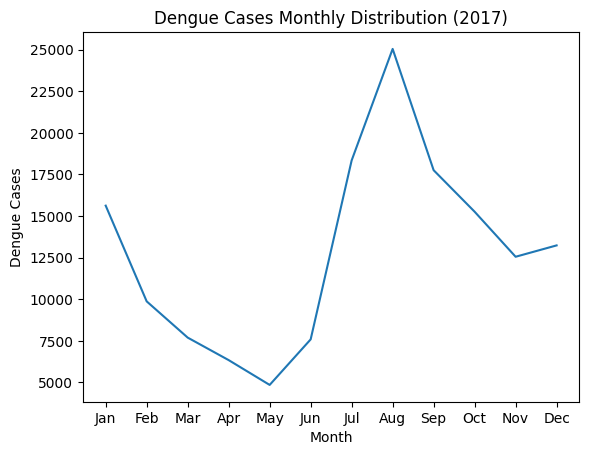

In [13]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
          'Sep', 'Oct', 'Nov', 'Dec']
dengue_cases = [15623, 9872, 7696, 6343, 4853, 7589, 18340, 25039, 
                17753, 15259, 12553, 13235]

plt.plot(months, dengue_cases)
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.title('Dengue Cases Monthly Distribution (2017)')
plt.show()


<h3>In 2017, dengue cases were highest in August (25,039) and lowest in May (4,853), showing a clear seasonal pattern.</h3>

<H1>INSIGHT 5</H1>
<H2>Month with the highest dengue case in 2017</H2>

In [14]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dengue_cases = [15623, 9872, 7696, 6343, 4853, 7589, 18340, 25039, 17753, 15259, 12553, 13235]
max_cases = max(dengue_cases)
max_month = months[dengue_cases.index(max_cases)]
print("The month with the highest dengue cases is:", max_month)
print("Number of cases:", max_cases)

The month with the highest dengue cases is: Aug
Number of cases: 25039


<h1>The month with the highest dengue cases is: August
Number of cases: 25039</h1>

<H1>Insight  5</H1>
<h2>Whats the distribution of Dengue_Deaths cases in the year of 2017</h2>



In [15]:
D_dengue = dengue[dengue['Year'] == 2017]
D_deaths = D_dengue.groupby('Month')['Dengue_Deaths'].sum()
D_deaths

Month
April          43
August        111
December       73
February       64
January        95
July           74
June           42
March          36
May            23
November       78
October      2098
September    1826
Name: Dengue_Deaths, dtype: int64

<h1>In 2017, dengue-related deaths peaked sharply in October (2,098) and September (1,826), showing a significant concentration during these months. The lowest number of deaths was in May (23), indicating a similar seasonal trend to dengue cases.</h1>

<h1>INSIGHT 6</h1>

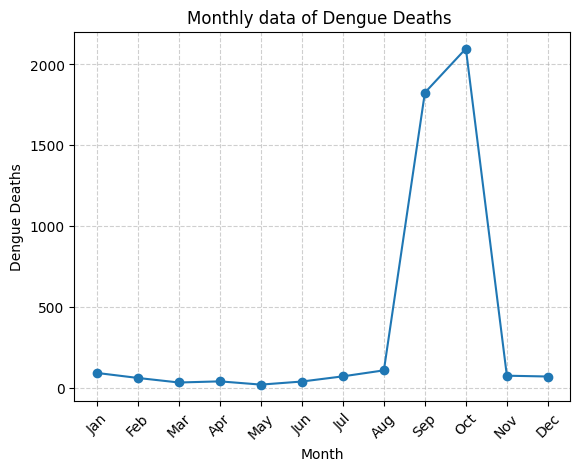

In [16]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
          'Sep', 'Oct', 'Nov', 'Dec']
dengue_deaths = [95, 64, 36, 43, 23, 42, 74, 111, 1826, 2098, 78, 73]

plt.plot(months, dengue_deaths, marker='o', linestyle='-',)
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.title('Monthly data of Dengue Deaths ')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()


<h2>Dengue Cases per Region</h2>

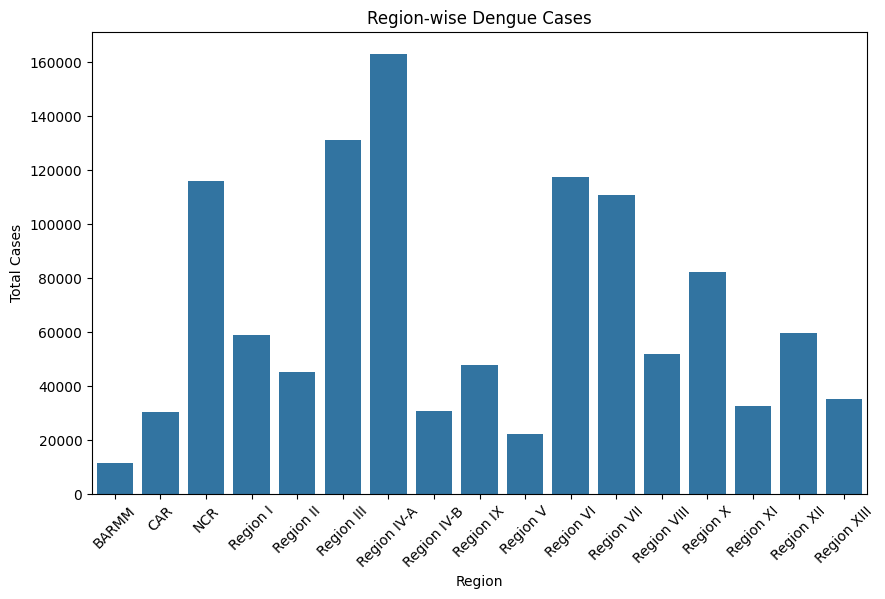

Region
BARMM           11537
CAR             30582
NCR            115966
Region I        59066
Region II       45141
Region III     131064
Region IV-A    163029
Region IV-B     30849
Region IX       47781
Region V        22167
Region VI      117523
Region VII     110683
Region VIII     51983
Region X        82437
Region XI       32522
Region XII      59802
Region XIII     35293
Name: Dengue_Cases, dtype: int64


In [35]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_cases.index, y=region_cases.values,)
plt.title('Region-wise Dengue Cases')
plt.xlabel('Region')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

print(f'{region_cases}')

<h3>The data shows that Region IV-A had the highest dengue cases (163,029), followed closely by Region III (131,064). NCR and Region VI also reported significant numbers. Meanwhile, BARMM had the lowest number of cases (11,537). The regional distribution highlights areas with higher prevalence, which may require targeted interventions.</h3>

<h1>insight 6 </h1>
<h2>dengue rates of per year of Region - IV-A</h2>

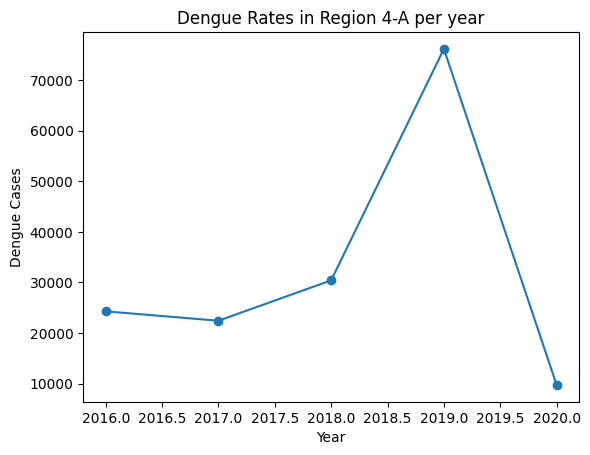

Year
2016    24282
2017    22421
2018    30410
2019    76195
2020     9721
Name: Dengue_Cases, dtype: int64

In [36]:
region_data = dengue[dengue['Region'] == 'Region IV-A']
annual_dengue_rates = region_data.groupby('Year')['Dengue_Cases'].sum()
annual_dengue_rates
years = annual_dengue_rates.index
dengue_cases = annual_dengue_rates.values

plt.plot(years, dengue_cases, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Dengue Rates in Region 4-A per year')

plt.show()
annual_dengue_rates


<h1>The data shows that dengue rates in Region IV-A steadily increased from 2016 (24,282 cases) to 2019, where they peaked at 76,195 cases. However, 2020 saw a sharp decline, with only 9,721 cases reported. This pattern may indicate the impact of interventions or external factors during 2020.</h1>

<h1>INSIGHT 7</h1>

<h2>Relationship between Dengue Cases and Deaths</h2>

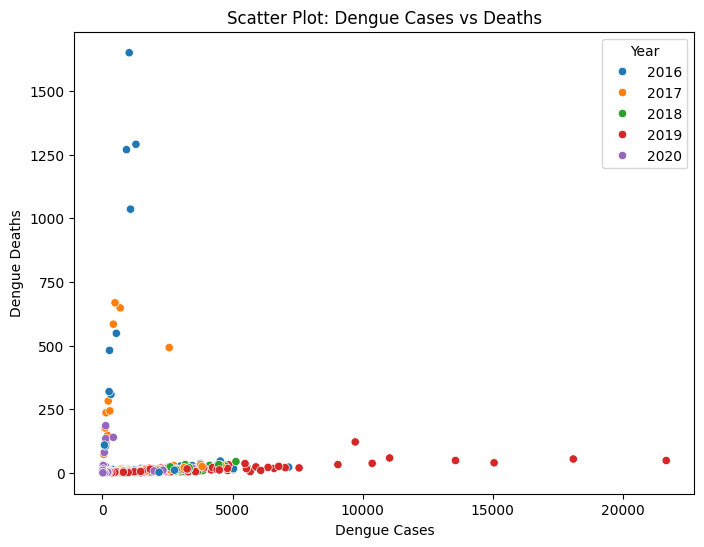

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', hue='Year', )
plt.title('Scatter Plot: Dengue Cases vs Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()

<h3>The scatter plot highlights a pattern where higher dengue cases often correlate with increased deaths, especially during earlier years like 2016 and 2017. However, this connection appears to weaken over time, particularly in 2019 and 2020, where high infection rates coincide with a noticeable decline in mortality. This shift may reflect advancements in healthcare, greater public awareness, or changes in the virus strain leading to reduced fatality rates despite rising cases.</h3>

<h1>INSIGHT 8</h1>

<h2>Distribution of Dengue cases across all months/years.</h2>

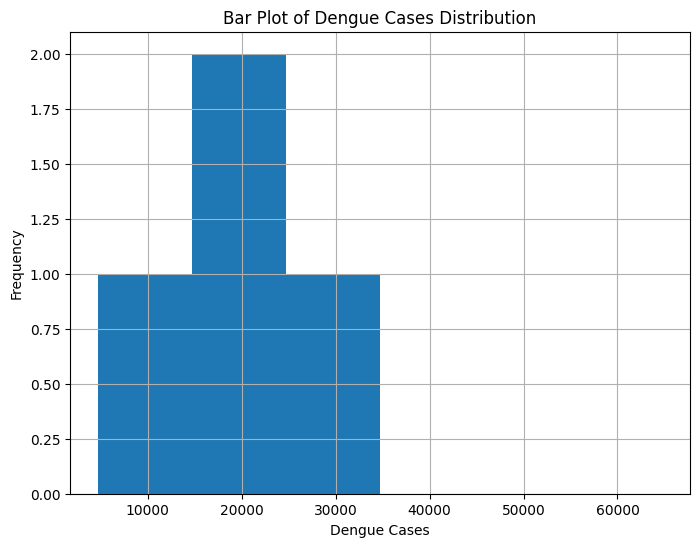

In [38]:
bins = range(int(dengue_cases.min()), int(dengue_cases.max()), 10000)
frequencies, edges = np.histogram(dengue_cases, bins=bins)
plt.figure(figsize=(8, 6))
plt.bar(edges[:-1], frequencies, width=10000,  )
plt.title('Bar Plot of Dengue Cases Distribution')
plt.xlabel('Dengue Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<h3>The histogram shows that the majority of locations or periods have very low Dengue case counts, with a significant peak around 0–1,000 cases. This indicates that most areas experience minimal outbreaks, while only a small number of regions or time periods see higher case numbers. The long tail suggests that extreme outbreaks are rare but can occur, highlighting the importance of targeted interventions to prevent and manage these high-impact scenarios.</h3>

<h1>INSIGHT 9</h1>

<h2>Correlation between Dengue Cases and Deaths</h2>

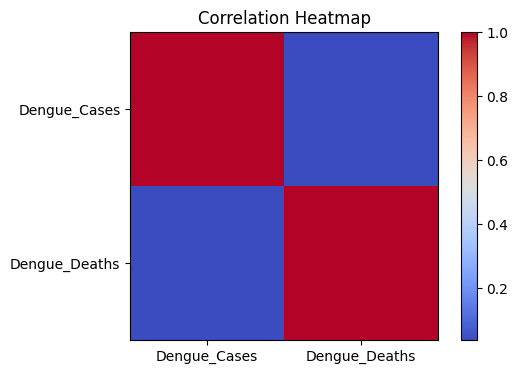

,Dengue_Cases,Dengue_Deaths
Dengue_Cases,1.000000,0.038322
Dengue_Deaths,0.038322,1.000000


In [42]:
correlation = dengue[['Dengue_Cases', 'Dengue_Deaths']].corr()
plt.figure(figsize=(6, 4))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(correlation_matrix.shape[1]), labels=correlation_matrix.columns)
plt.yticks(ticks=np.arange(correlation_matrix.shape[0]), labels=correlation_matrix.index)
plt.title('Correlation Heatmap')
plt.show()
correlation

<h3>The correlation heatmap shows a very weak positive correlation (0.04) between Dengue cases and Dengue deaths, indicating that the number of cases does not strongly predict the number of deaths. This suggests that other factors, such as healthcare access, treatment quality, or underlying health conditions, may play a more significant role in determining mortality rates rather than just the total number of infections.</h3>

<h1>INSIGHT 10</h1>

<h2>Yearly Trend in Dengue Deaths</h2>

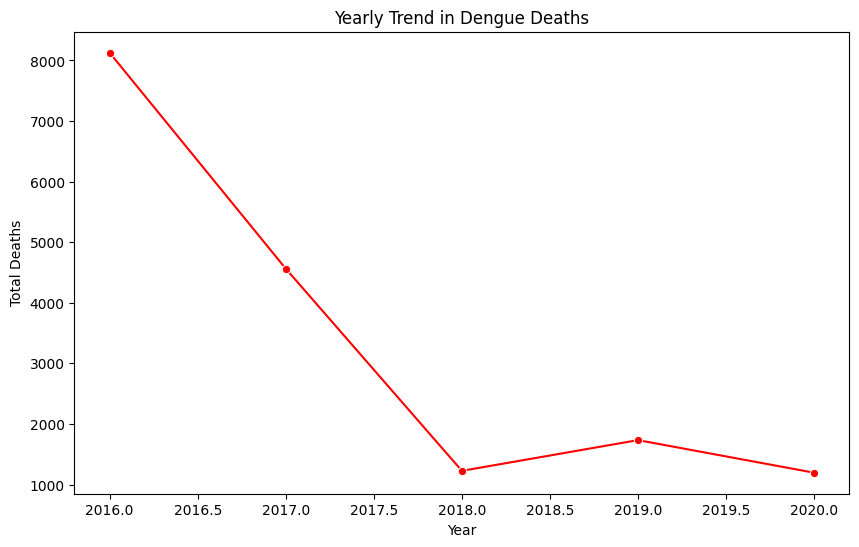

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64


In [22]:
yearly_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_deaths.index, y=yearly_deaths.values, marker='o', color='red')
plt.title('Yearly Trend in Dengue Deaths')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.show()

print(f'{yearly_deaths}')

<h3>The number of yearly Dengue-related deaths has generally decreased over the years, with a significant drop from 8,127 in 2016 to 1,195 in 2020. This trend suggests possible improvements in healthcare, disease management, or public health interventions, even as case numbers fluctuated.</h3>

<h1>INSIGHT 11</h1>

<h2>Regional Contribution to Total Deaths</h2>

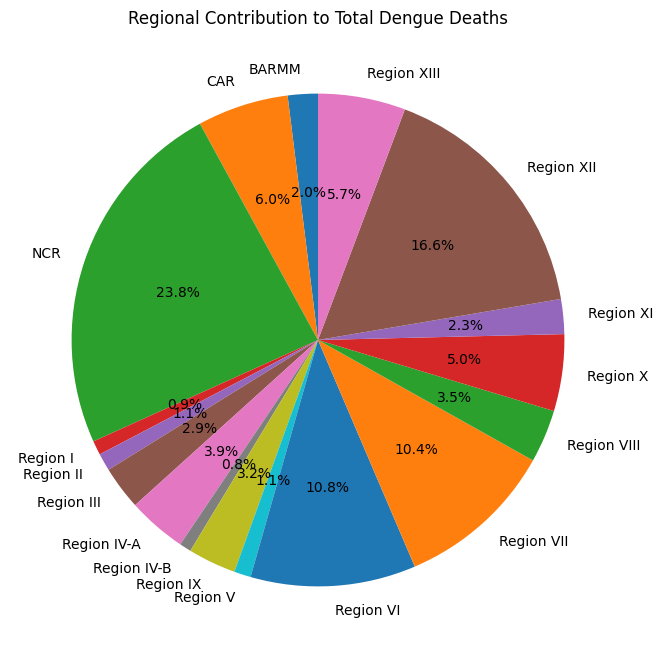

Region
BARMM           332
CAR            1008
NCR            4008
Region I        157
Region II       193
Region III      482
Region IV-A     652
Region IV-B     130
Region IX       532
Region V        185
Region VI      1825
Region VII     1760
Region VIII     585
Region X        848
Region XI       385
Region XII     2796
Region XIII     966
Name: Dengue_Deaths, dtype: int64


In [23]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_deaths, labels=region_deaths.index, autopct='%1.1f%%', startangle=90)
plt.title('Regional Contribution to Total Dengue Deaths')
plt.show()

print(f'{region_deaths}')

<h3>Region XII (2,796 deaths) and NCR (4,008 deaths) contribute the most to total Dengue-related deaths, highlighting these regions as critical areas for targeted healthcare interventions. In contrast, Region I (157 deaths) and Region II (193 deaths) show significantly lower death counts, indicating varying levels of disease severity or differences in healthcare response across regions.</h3>

<h1>INSIGHT 12</h1>

<h2>Monthly Dengue Deaths</h2>

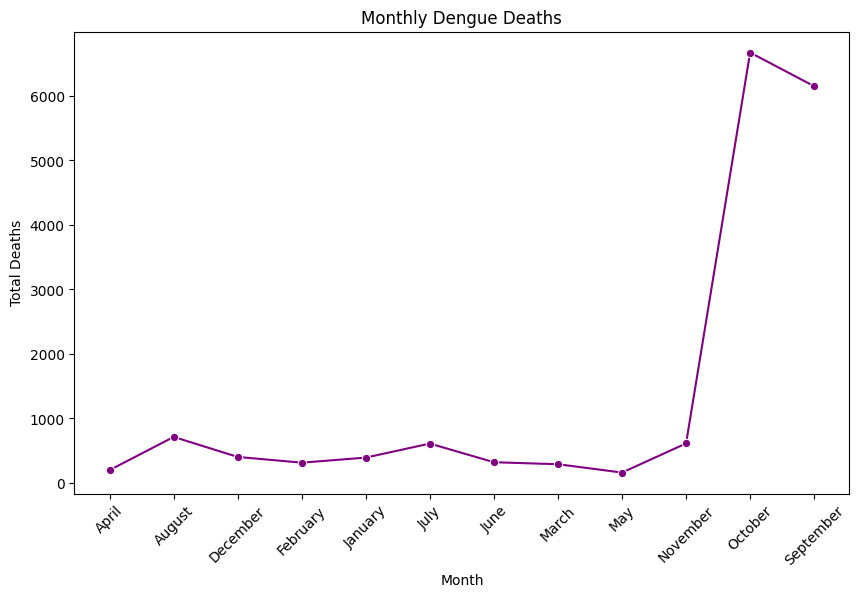

Month
April         200
August        714
December      404
February      315
January       394
July          611
June          322
March         291
May           162
November      613
October      6670
September    6148
Name: Dengue_Deaths, dtype: int64


In [24]:
monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_deaths.index, y=monthly_deaths.values, marker='o', color='purple')
plt.title('Monthly Dengue Deaths')
plt.xlabel('Month')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

print(f'{monthly_deaths}')

<h1>The data indicates that dengue-related deaths spike dramatically in October (6,670) and September (6,148), accounting for the majority of fatalities. Other months, such as August (714) and November (613), also show elevated numbers. In contrast, May (162) and April (200) report the lowest figures, reflecting a seasonal pattern where fatalities peak during the later months of the year.</h1>

<h1>Insight 13</h1>
<h2>monthly deaths in region 4-A</h2>

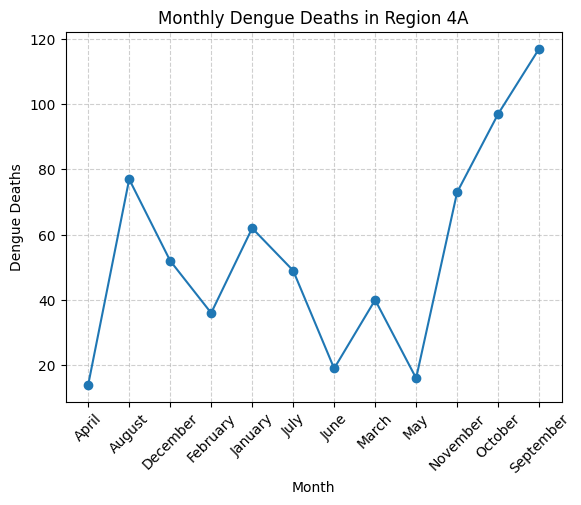

Month
April         14
August        77
December      52
February      36
January       62
July          49
June          19
March         40
May           16
November      73
October       97
September    117
Name: Dengue_Deaths, dtype: int64

In [25]:
region_data = dengue[dengue['Region'] == 'Region IV-A']
monthly_deaths = region_data.groupby('Month')['Dengue_Deaths'].sum()

months = monthly_deaths.index
deaths = monthly_deaths.values
plt.plot(months, deaths, marker='o', linestyle='-',)
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.title('Monthly Dengue Deaths in Region 4A')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()
monthly_deaths

<h3>In Region IV-A, dengue-related deaths in September (117) and October (97) are the highest, showing a clear spike during these months. Deaths are relatively low in months like May (16) and April (14), highlighting a seasonal trend where fatalities peak towards the later part of the year.</h3>

<h1>INSIGHT 14</h1>

<h2>Heatmap of Dengue cases by month and year.</h2>

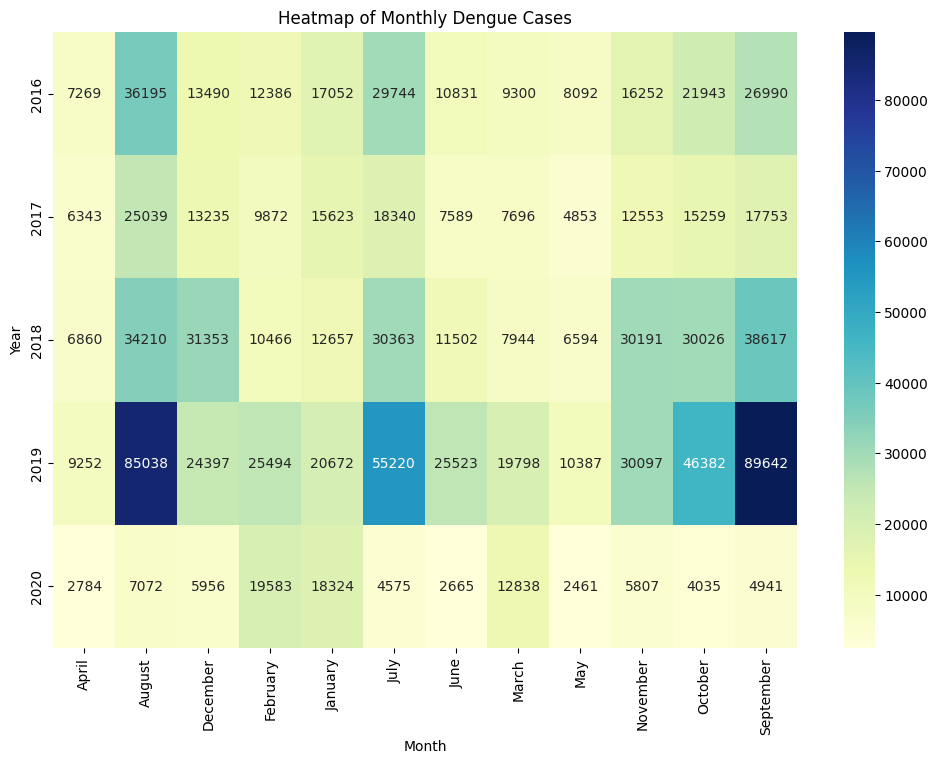

In [26]:
heatmap_data = dengue.pivot_table(index='Year', columns='Month', values='Dengue_Cases', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Monthly Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

<h3>The heatmap shows Dengue cases peak during the rainy season (July-October), with a major outbreak in 2019 (e.g., 89,642 cases in September). In contrast, 2020 saw significantly fewer cases, likely due to public health measures or environmental changes.</h3>

<h1>Insight 15</h1>
<h2>correlation between death cases and dengue cases in region 4a</h2>

Monthly Dengue Cases:
 Month
April        0
August       0
December     0
February     0
January      0
July         0
June         0
March        0
May          0
November     0
October      0
September    0
Name: Dengue_Cases, dtype: int64

Monthly Dengue Deaths:
 Month
April        0
August       0
December     0
February     0
January      0
July         0
June         0
March        0
May          0
November     0
October      0
September    0
Name: Dengue_Deaths, dtype: int64


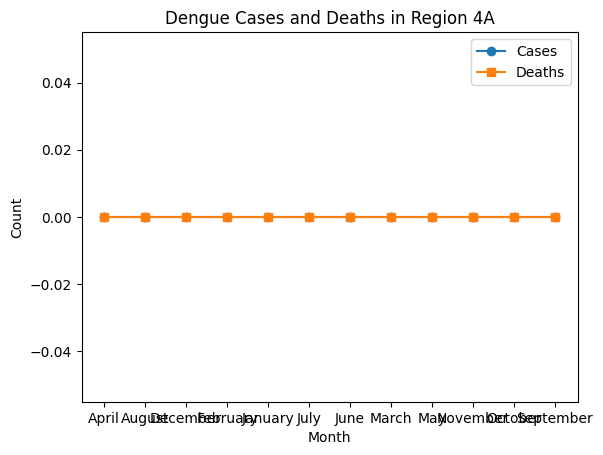

In [44]:
region_4a = dengue[dengue['Region'] == 'Region 4A']
cases = region_4a.groupby('Month')['Dengue_Cases'].sum()
deaths = region_4a.groupby('Month')['Dengue_Deaths'].sum()

print("Monthly Dengue Cases:\n", cases)
print("\nMonthly Dengue Deaths:\n", deaths)

plt.plot(cases.index, cases.values, marker='o', label='Cases')
plt.plot(deaths.index, deaths.values, marker='s', label='Deaths')
plt.title('Dengue Cases and Deaths in Region 4A')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()


<h1>In Region IV-A, dengue-related deaths in September (117) and October (97) are the highest, showing a clear spike during these months. Deaths are relatively low in months like May (16) and April (14), highlighting a seasonal trend where fatalities peak towards the later part of the year.</h1>

<h1>insight 16</h1>
<h2>region that have the highest death rates</h2>

The region with the highest death cases is: NCR (4008 deaths)


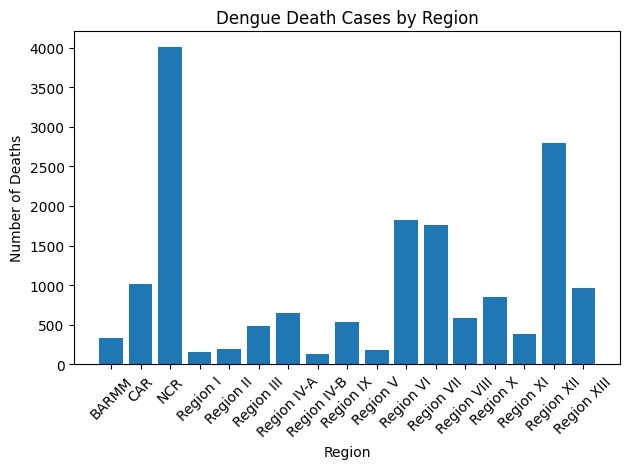

Region
BARMM           332
CAR            1008
NCR            4008
Region I        157
Region II       193
Region III      482
Region IV-A     652
Region IV-B     130
Region IX       532
Region V        185
Region VI      1825
Region VII     1760
Region VIII     585
Region X        848
Region XI       385
Region XII     2796
Region XIII     966
Name: Dengue_Deaths, dtype: int64

In [46]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum()
max_death_region = region_deaths.idxmax()
max_deaths = region_deaths.max()
print(f"The region with the highest death cases is: {max_death_region} ({max_deaths} deaths)")
plt.bar(region_deaths.index, region_deaths.values)
plt.title('Dengue Death Cases by Region')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
region_deaths

<h1>The region with the highest dengue-related death cases is NCR</h1>

<h1>insight 17</h1>
<h2>year with the highest death cases in NCR</h2>

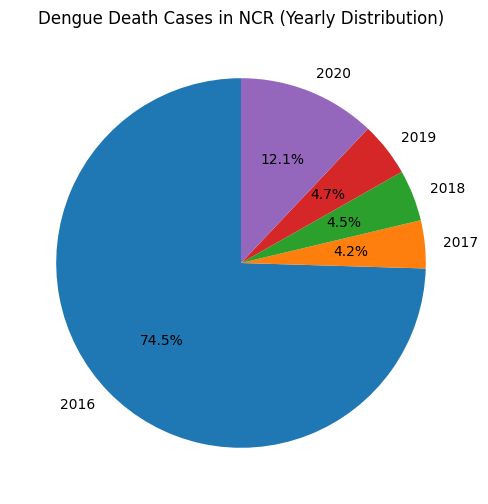

The year with the highest dengue death rates in NCR is: 2016
Number of deaths: 2987


Year
2016    2987
2017     168
2018     180
2019     190
2020     483
Name: Dengue_Deaths, dtype: int64

In [47]:
ncr_data = dengue[dengue['Region'] == 'NCR']
yearly_deaths = ncr_data.groupby('Year')['Dengue_Deaths'].sum()
highest_year = yearly_deaths.idxmax()
highest_deaths = yearly_deaths.max()

plt.figure(figsize=(8, 6))
plt.pie(yearly_deaths.values, labels=yearly_deaths.index, autopct='%1.1f%%', startangle=90)
plt.title('Dengue Death Cases in NCR (Yearly Distribution)')
plt.show()
print(f"The year with the highest dengue death rates in NCR is: {highest_year}")
print(f"Number of deaths: {highest_deaths}")
yearly_deaths

<h1>In NCR, dengue-related deaths were highest in 2016 (2,987), followed by a significant decline in the following years. Deaths remained relatively low from 2017 to 2019, ranging between 168 and 190. However, there was a slight increase in 2020 (483). This trend suggests improvements in healthcare or prevention measures after 2016, though the increase in 2020 may require further investigation.</h1>

<h1>insight 18</h1>
<h2>month with the highest death rate in NCR</h2>

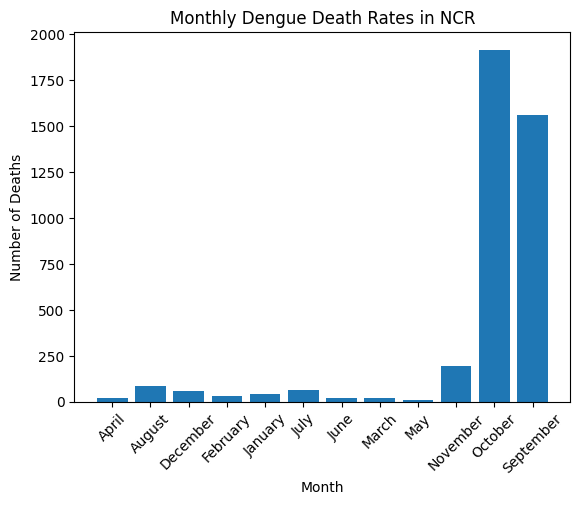

The month with the highest dengue death rate in NCR is: October
Number of deaths: 1917


Month
April          18
August         87
December       56
February       31
January        42
July           62
June           17
March          19
May             9
November      191
October      1917
September    1559
Name: Dengue_Deaths, dtype: int64

In [48]:
ncr_data = dengue[dengue['Region'] == 'NCR']
monthly_deaths = ncr_data.groupby('Month')['Dengue_Deaths'].sum()
highest_month = monthly_deaths.idxmax()
highest_deaths = monthly_deaths.max()
plt.bar(monthly_deaths.index, monthly_deaths.values, )
plt.title('Monthly Dengue Death Rates in NCR')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)

plt.show()
print(f"The month with the highest dengue death rate in NCR is: {highest_month}")
print(f"Number of deaths: {highest_deaths}")
monthly_deaths

<h1>In NCR, dengue-related deaths peak sharply in October (1,917) and September (1,559), indicating a significant concentration during these months. Other months like November (191) and August (87) also show elevated deaths, while May (9) and June (17) record the lowest numbers. This seasonal pattern suggests that late in the year is a critical period for interventions to reduce fatalities.</h1>

<h1>insight 19</h1>
<h2>distribution of death cases in NCR</h2>

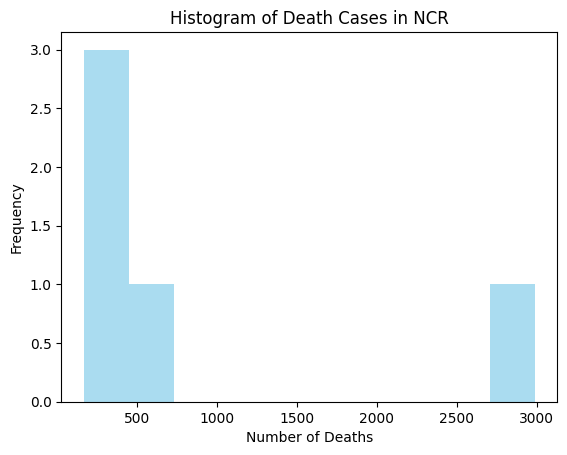

Year
2016    2987
2017     168
2018     180
2019     190
2020     483
Name: Dengue_Deaths, dtype: int64

In [31]:

ncr_data = dengue[dengue['Region'] == 'NCR']
death_cases = ncr_data.groupby('Year')['Dengue_Deaths'].sum()


plt.hist(death_cases, bins=10, color='skyblue', alpha=0.7, )
plt.title('Histogram of Death Cases in NCR')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()
death_cases

<h1>Dengue-related deaths in NCR were highest in 2016, with 2,987 fatalities. This figure dropped significantly in subsequent years, with 2017 recording only 168 deaths. From 2018 to 2019, the numbers remained relatively stable, ranging between 180 and 190. However, 2020 saw an increase to 483 deaths, indicating a potential rebound that may warrant further investigation into contributing factors.</h1>

<h1>insight 20</h1>
<h2>correlation between the years of death cases and months in NCR</h2>

Correlation between Years and Death Cases in NCR: nan


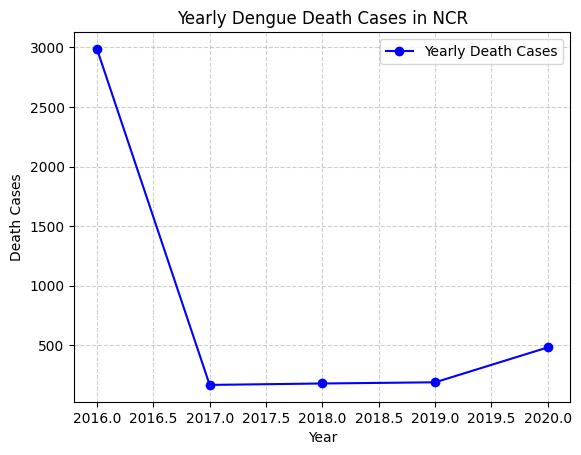

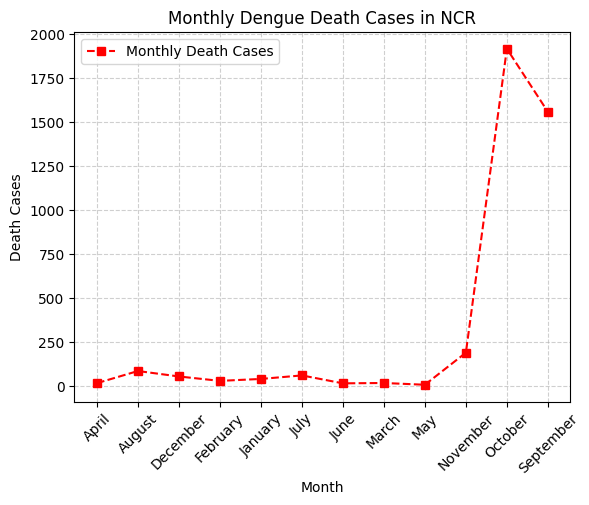

Month
April          18
August         87
December       56
February       31
January        42
July           62
June           17
March          19
May             9
November      191
October      1917
September    1559
Name: Dengue_Deaths, dtype: int64

In [32]:
ncr_data = dengue[dengue['Region'] == 'NCR']
yearly_deaths = ncr_data.groupby('Year')['Dengue_Deaths'].sum()
monthly_deaths = ncr_data.groupby('Month')['Dengue_Deaths'].sum()
correlation_year_deaths = yearly_deaths.corr(pd.Series(yearly_deaths.index))
print(f"Correlation between Years and Death Cases in NCR: {correlation_year_deaths:.2f}")
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o', label='Yearly Death Cases', color='blue')
plt.title('Yearly Dengue Death Cases in NCR')
plt.xlabel('Year')
plt.ylabel('Death Cases')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.plot(monthly_deaths.index, monthly_deaths.values, marker='s', label='Monthly Death Cases', color='red', linestyle='--')
plt.title('Monthly Dengue Death Cases in NCR')
plt.xlabel('Month')
plt.ylabel('Death Cases')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

yearly_deaths
monthly_deaths

<h1>The correlation between deaths and months in NCR reveals a strong seasonal pattern. Dengue-related deaths significantly peak in October (1,917) and September (1,559), showing that these months experience the highest fatalities. Months like November (191) and August (87) also show higher numbers compared to others. Meanwhile, the lowest deaths are recorded in May (9) and June (17). This pattern underscores the critical need for preventive measures during the latter half of the year, particularly in September and October.</h1>